# 📉 Lasso Regression Demonstration


In this notebook, we will explore **Lasso Regression (L1 Regularization)**.  
Lasso not only reduces overfitting but also performs **feature selection** by driving some coefficients exactly to zero.  

We’ll demonstrate this step by step with a synthetic dataset.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# For reproducibility
np.random.seed(42)

## Step 1: Generate Synthetic Data

In [2]:
# Generate data with 100 samples, 10 features
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)

# Only first 3 features are useful
true_coef = np.zeros(n_features)
true_coef[:3] = [1.5, -2.0, 3.0]

y = X @ true_coef + np.random.randn(n_samples) * 0.5

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 2: Ordinary Least Squares (OLS) Regression

In [3]:
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_coef = ols.coef_

print("OLS Coefficients:", ols_coef)

OLS Coefficients: [ 1.49389639e+00 -2.02370112e+00  3.03691425e+00  3.79533988e-02
 -6.29591993e-02  6.20222859e-04 -1.52671437e-01  5.84393635e-02
  1.49970212e-02 -1.32183321e-02]


## Step 3: Lasso Regression

In [4]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

print("Lasso Coefficients:", lasso_coef)

Lasso Coefficients: [ 1.35981432 -1.91180895  2.88994287  0.         -0.          0.
 -0.          0.          0.          0.        ]


### Compare OLS vs Lasso Coefficients

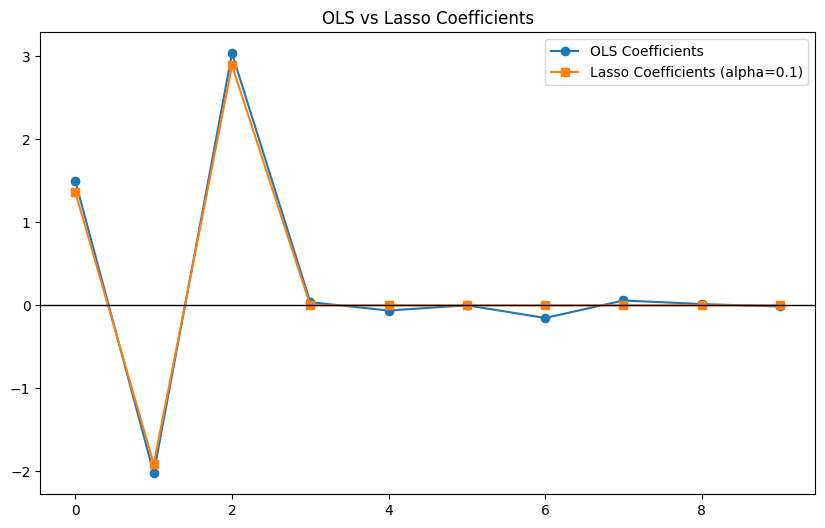

In [5]:
plt.figure(figsize=(10,6))
plt.plot(ols_coef, 'o-', label="OLS Coefficients")
plt.plot(lasso_coef, 's-', label="Lasso Coefficients (alpha=0.1)")
plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.title("OLS vs Lasso Coefficients")
plt.show()

## Step 4: Effect of Regularization Strength (λ / alpha)

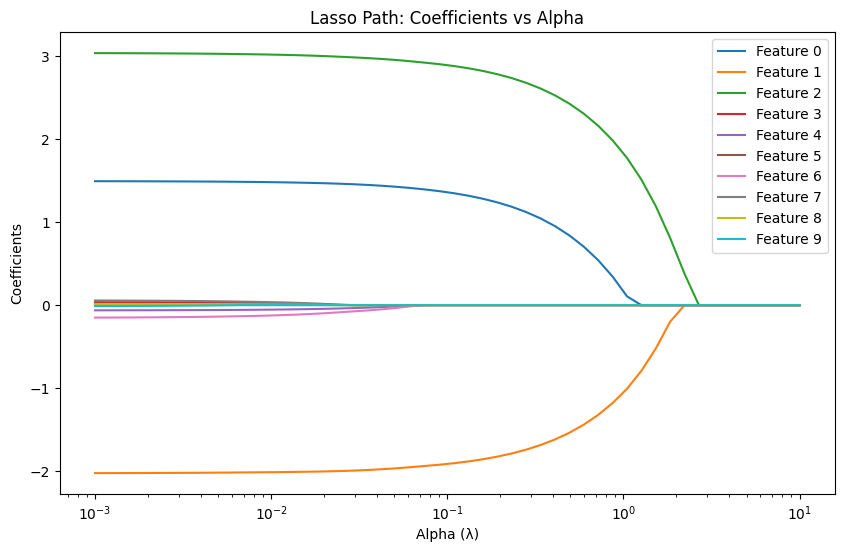

In [6]:
alphas = np.logspace(-3, 1, 50)
coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10,6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("Coefficients")
plt.title("Lasso Path: Coefficients vs Alpha")
plt.legend([f"Feature {i}" for i in range(n_features)], loc='best')
plt.show()

## Step 5: Bias-Variance Tradeoff

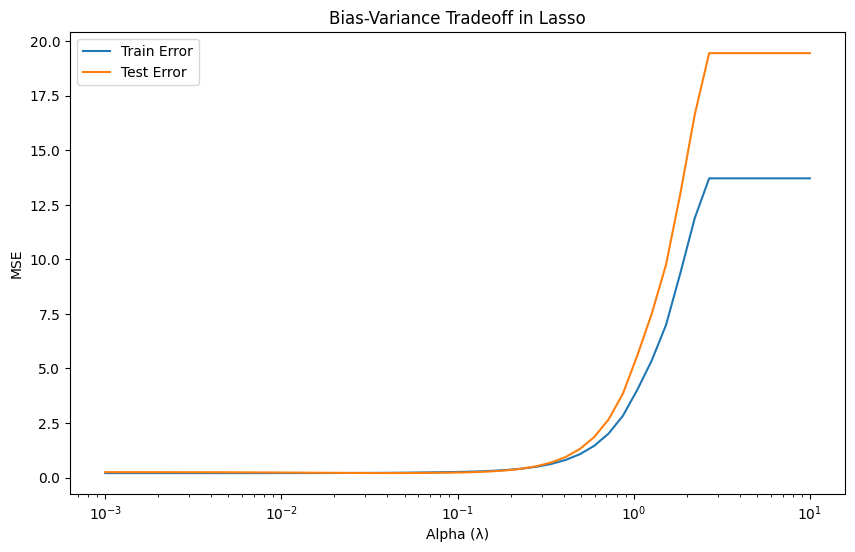

In [7]:
train_errors, test_errors = [], []
alphas = np.logspace(-3, 1, 50)

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, lasso.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, lasso.predict(X_test)))

plt.figure(figsize=(10,6))
plt.plot(alphas, train_errors, label="Train Error")
plt.plot(alphas, test_errors, label="Test Error")
plt.xscale('log')
plt.xlabel("Alpha (λ)")
plt.ylabel("MSE")
plt.title("Bias-Variance Tradeoff in Lasso")
plt.legend()
plt.show()